### Experinment: Independant Componant Analysis

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import scipy as sp
from sklearn import preprocessing
import scipy.sparse.linalg
import matplotlib.pyplot as plt

# %matplotlib inline


NUM_FRAME = 226
IM_LENGTH = 640
IM_HEIGHT = 480

In [2]:
%%time

ideal_cam1_mat = np.asarray(sio.loadmat('cam1_1')['vidFrames1_1'])
ideal_cam2_mat = np.asarray(sio.loadmat('cam2_1')['vidFrames2_1'])
ideal_cam3_mat = np.asarray(sio.loadmat('cam3_1')['vidFrames3_1'])

Wall time: 4.52 s


#  Test1: ideal Data: Viedeo Recored by a Steady Hand

#### Animate Ideal Vedio Camera 1

In [3]:
# First set up the figure
fig1 = plt.figure()

im_ideal_cam1=plt.imshow(ideal_cam1_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_ideal_cam1(i):
    curr_frame = im_ideal_cam1.set_data(ideal_cam1_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_ideal_cam1 = animation.FuncAnimation(fig1, animate_ideal_cam1, frames=NUM_FRAME, interval=20)

anim_ideal_cam1.save('ideal_cam1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [4]:
HTML(anim_ideal_cam1.to_html5_video())

#### Animate Ideal Vedio Camera 2

In [5]:
fig2 = plt.figure()

im_ideal_cam2=plt.imshow(ideal_cam2_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_ideal_cam2(i):
    curr_frame = im_ideal_cam2.set_data(ideal_cam2_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_ideal_cam2 = animation.FuncAnimation(fig2, animate_ideal_cam2, frames=NUM_FRAME, interval=20)

anim_ideal_cam2.save('ideal_cam2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [6]:
HTML(anim_ideal_cam2.to_html5_video())

#### Animate Ideal Vedio Camera 3

In [8]:
fig3 = plt.figure()

im_ideal_cam3=plt.imshow(ideal_cam3_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_ideal_cam3(i):
    curr_frame = im_ideal_cam3.set_data(ideal_cam3_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_ideal_cam3 = animation.FuncAnimation(fig3, animate_ideal_cam3, frames=NUM_FRAME, interval=20)

anim_ideal_cam3.save('ideal_cam3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [9]:
HTML(anim_ideal_cam3.to_html5_video())

# Box(ideal_cam1,2,3) && PCA

We experimented two ways in boxing the data into a single raw data matrix:  
1. [cam_1, cam_2, cam_3]: for each col. the time varying vectos are stacked horizontally from n=0 (i.e. frame 1) on the top to n=226 on the bottom.  
2. [fram_1(cam1,2,3), frame_2(cam1,2,3), frame_3(cam1,2,3)]: in this case, time marches from the left side of the matrix to the right side of matrix. In addtion, each col contains a gross information on three camers

## Boxing Method 1

In [10]:
%%time
# ideal_data_matrix = np.zeros((IM_LENGTH*IM_HEIGHT,NUM_FRAME))
ideal_data_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = np.vstack((ideal_cam1_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 
                          ideal_cam2_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 
                          ideal_cam3_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1)))
    ideal_data_matrix2.append(col_curr)

ideal_data_matrix2 = np.asarray(ideal_data_matrix2).squeeze()

print(ideal_data_matrix2.shape) 
print(min(ideal_data_matrix2.shape))

(226, 921600)
226
Wall time: 448 ms


We observe that this data matrix is HUGE. One attempt to apply standard SVD by scipy library return "error: too large to handle". Therefore, we will be using "sp.sparse.linalg.svds" to calcualte the modes.  

In [11]:
%%time 
ideal_data_matrix2_scaled = preprocessing.scale(ideal_data_matrix2) 

U_p12,Lamda_p12,V_s_p12 = sp.sparse.linalg.svds(ideal_data_matrix2_scaled,k=100)
print(Lamda_p12)

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


[  377.10695962   378.06059801   382.70594171   386.31922997   392.30565505
   393.98710702   398.21466704   401.29563577   402.61080586   403.43965861
   408.97586142   412.57053677   415.21801147   420.01940898   423.35805728
   428.866789     430.9326463    434.08258223   441.15255956   443.48019339
   444.64994054   448.57415762   452.37093303   457.04891387   459.21960362
   468.64548602   474.00333133   478.61031013   489.84641072   491.15863719
   492.9398408    496.60479977   501.0106658    509.53939574   512.53307003
   512.67906376   522.62306145   525.01383637   534.80808514   536.86002454
   544.05688991   552.20298316   555.13744322   563.3485597    566.89565828
   582.07533692   592.83414175   593.88122814   601.80331706   606.36119111
   616.89100238   626.05445723   630.34577393   647.32632005   649.16772662
   663.14304447   671.77233043   677.47386242   685.11769482   709.05726479
   716.785316     725.38094019   735.48681138   754.48153605   763.28991528
   799.48457

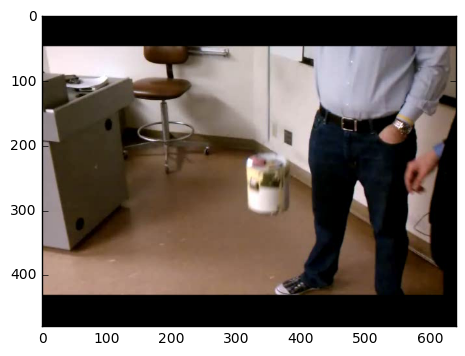

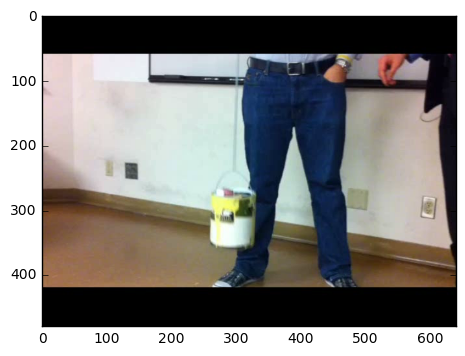

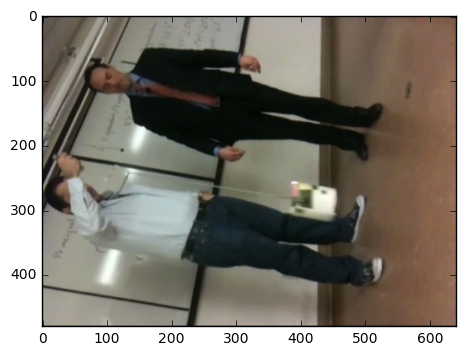

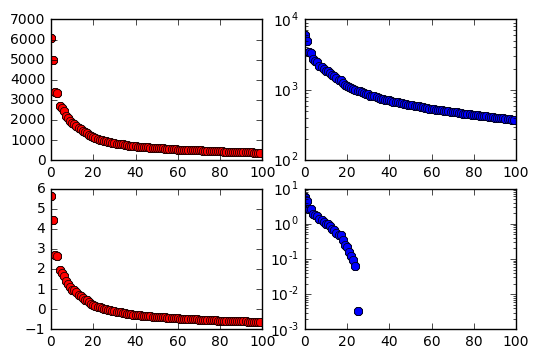

In [15]:
## Plot:
Lamda_p12_sorted = -np.sort(-Lamda_p12)
Lamda_p12_sorted_normed = preprocessing.scale(Lamda_p12_sorted) 

plt.subplot(2,2,1)
plt.plot(Lamda_p12_sorted,'ro')

plt.subplot(2,2,2)
plt.semilogy(Lamda_p12_sorted,'bo')

plt.subplot(2,2,3)
plt.plot(Lamda_p12_sorted_normed,'ro')

plt.subplot(2,2,4)
plt.semilogy(Lamda_p12_sorted_normed,'bo')

plt.show()

In [13]:
n_ideal_positive = np.prod(Lamda_p12_sorted_normed[Lamda_p12_sorted_normed>=0].shape)
n_ideal_negative = np.prod(Lamda_p12_sorted_normed[Lamda_p12_sorted_normed< 0].shape)

print(n_ideal_positive,n_ideal_negative)

26 74


## Boxing Method 2: cam1 Only

We observe that the singular value decays smoothly, this implies difficultity in dimensional reduction.  
The intuition is that the three cameras are not recording simotinously!!!  

Therefore, we now examine a single camera, namely cam 1, in hope to detect the motion of the mass in the video.

In [16]:
%%time
# ideal_data_matrix = np.zeros((IM_LENGTH*IM_HEIGHT,NUM_FRAME))
ideal_cam1_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = ideal_cam1_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    ideal_cam1_matrix2.append(col_curr)

ideal_cam1_matrix2 = np.asarray(ideal_cam1_matrix2).squeeze()

print(ideal_cam1_matrix2.shape) 

(226, 307200)
Wall time: 180 ms


This matrix is the right demension but we want the rows to represent the time axis, therefore the following analysis will take the transpose of the matrix.

In [17]:
%%time 
ideal_cam1_matrix2 = np.transpose(ideal_cam1_matrix2)
print(ideal_cam1_matrix2.shape) 

ideal_cam1_matrix2_scaled = preprocessing.scale(ideal_cam1_matrix2) 


U_cam1_p12,Lamda_cam1_p12,V_s_cam1_p12 = sp.sparse.linalg.svds(ideal_cam1_matrix2_scaled,k=100)

(307200, 226)


C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


Wall time: 18 s


In [18]:
## Plot:
Lamda_cam1_p12_sorted = -np.sort(-Lamda_cam1_p12)
Lamda_cam1_p12_sorted_normed = preprocessing.scale(Lamda_cam1_p12_sorted) 

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam1_p12_sorted/sum(Lamda_cam1_p12_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Ideal Cam1: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam1_p12_sorted/sum(Lamda_cam1_p12_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Ideal Cam1: Singular Values-Log Scale")
plt.subplots_adjust(hspace=0.5)



In [19]:
print(U_cam1_p12.shape)
print(Lamda_cam1_p12.shape)
print(V_s_cam1_p12.shape)
# plt.plot(U_cam1_p12[])

plt.subplot(2,1,1)
plt.plot(U_cam1_p12[:,0],linewidth=0.2)

plt.subplot(2,1,2)
plt.plot(ideal_cam1_matrix2_scaled[:,0],linewidth=0.2)




(307200, 100)
(100,)
(100, 226)


In [20]:
re_cam1_d1 = U_cam1_p12[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d2 = U_cam1_p12[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d3 = U_cam1_p12[:,2].reshape(IM_HEIGHT,IM_LENGTH)

plt.imshow(re_cam1_d1, 'gray')
plt.title('Case3: Reconstructed First Frame with Mode 1 (CAM2')

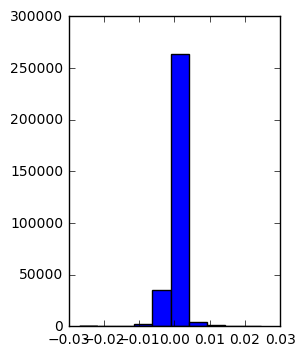

-0.000108336674424


In [21]:
plt.subplot(1,2,1)
plt.hist(U_cam1_p12[:,0])

# plt.subplot(1,2,2)
# plt.hist(ideal_cam1_matrix2_scaled[:,0])

plt.show()

print(re_cam1_d1[350,300])

In [22]:
# from skimage.feature import canny
# edges = canny(re_cam1_d1/255.)

# plt.imshow(edges)
from skimage.filters import sobel
elevation_map = sobel(re_cam1_d1)
plt.imshow(elevation_map)

In [23]:
markers = np.zeros_like(re_cam1_d1)
markers[re_cam1_d1<=0.0085] = 2
plt.imshow(markers)

In [24]:
from skimage.morphology import watershed
segmentation = watershed(elevation_map, markers)
plt.imshow(segmentation)

(307200, 226)


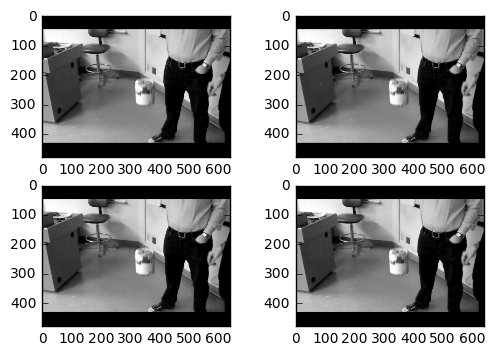

In [25]:
#recall variable names:U_cam1_p12,Lamda_cam1_p12,V_s_cam1_p12 
reconstructed_idael_cam1 = np.dot(U_cam1_p12,np.dot(np.diag(Lamda_cam1_p12),V_s_cam1_p12))
print(reconstructed_idael_cam1.shape)

frame1 = reconstructed_idael_cam1[:,0].reshape(IM_HEIGHT,IM_LENGTH)
frame2 = reconstructed_idael_cam1[:,1].reshape(IM_HEIGHT,IM_LENGTH)
frame3 = reconstructed_idael_cam1[:,2].reshape(IM_HEIGHT,IM_LENGTH)
frame4 = reconstructed_idael_cam1[:,3].reshape(IM_HEIGHT,IM_LENGTH)


##Plot to visualize
plt.subplot(2,2,1)
plt.imshow(frame1, 'gray')


plt.subplot(2,2,2)
plt.imshow(frame2, 'gray')


plt.subplot(2,2,3)
plt.imshow(frame3, 'gray')

plt.subplot(2,2,4)
plt.imshow(frame4, 'gray')


plt.show()

In [26]:
##
#2D mask to 1D mask 

mask_2d = np.zeros([IM_HEIGHT,IM_LENGTH])
for i in range (200,400):
    for j in range (300,400):
        mask_2d[i,j] = 1
        
mask_1d = mask_2d.reshape(IM_HEIGHT*IM_LENGTH,1)
print(mask_1d.shape)
index_mask_1d = np.asarray(np.where(mask_1d == 1)[0])
print(index_mask_1d)   # Index_mask_1d gives the mask for cropping out the mass for cam in ideal case
print(index_mask_1d.shape)



## Cropping
frame1 = reconstructed_idael_cam1[:,0]
cropped_frame1 = np.zeros_like(frame1)

for i in index_mask_1d:
    cropped_frame1[i] = frame1[i]
plt.imshow(cropped_frame1.reshape(IM_HEIGHT,IM_LENGTH))    

(307200, 1)
[128300 128301 128302 ..., 255757 255758 255759]
(20000,)


In [27]:
# %%time
cropped_images = []
markers = []
for i in range(0,NUM_FRAME):
    curr_frame = reconstructed_idael_cam1[:,i]
    curr_cropped_frame = np.zeros_like(curr_frame)
    
    for j in index_mask_1d:
        curr_cropped_frame[j] = curr_frame[j]
    
    curr_max_pixel = np.amax(curr_cropped_frame)
    curr_marker = np.where(curr_cropped_frame.reshape(IM_HEIGHT,IM_LENGTH) == curr_max_pixel)
    curr_marker_2d = np.asarray(curr_marker).squeeze().reshape(2,1)
    
    
    markers.append(curr_marker_2d)
    
markers = np.transpose(np.asarray(markers).squeeze())
print(markers.shape)

(2, 226)


Horizontal Movement Variance:  2188.46910486
Vertical Movemrnt Variance:  93.6890907667


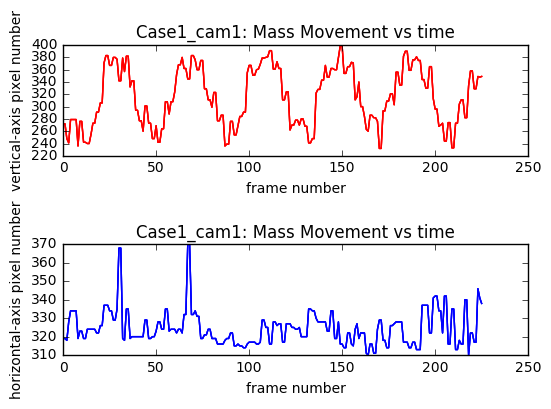

In [32]:
x = markers[0,:]
y = markers[1,:]
n = np.arange(NUM_FRAME)

plt.subplot(2,1,1)
plt.plot(n,x,'r')

plt.title('Case1_cam1: Mass Movement vs time') 
plt.xlabel('frame number')
plt.ylabel('vertical-axis pixel number')


plt.subplot(2,1,2)
plt.plot(n,y,'b')
plt.title('Case1_cam1: Mass Movement vs time') 
plt.xlabel('frame number')
plt.ylabel('horizontal-axis pixel number')

plt.subplots_adjust(hspace=0.8)

print("Horizontal Movement Variance: ", np.var(x))
print("Vertical Movemrnt Variance: ", np.var(y))

plt.show()
